In [7]:
from tensorflow.keras.models import load_model
from data import *
import os

In [8]:
# for Gunpowder
ZARR_FOLDER = '../../../../data/cells/raw/zarr/'
gp_batch_size= 12
gp_voxel_shape = [1,1,1]
gp_input_shape= [240, 240,4]
gp_output_shape = [ 240, 240,4]

# For unet
OUTPUT_PATH = '../../../../data/cells/models/'
model_name = 'unet_cells.hdf5'
unet_input_size = (240,240,4)
unet_output_size = 4

In [9]:
model_path = os.path.join(OUTPUT_PATH,model_name)

In [14]:
model = load_model(model_path)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 240, 4) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 240, 64) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 240, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 120, 120, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [16]:
gen_train_fast = generate_fast_training_batch(ZARR_FOLDER, batch_size=gp_batch_size
                                              ,voxel_shape = gp_voxel_shape,
                                              input_shape= gp_input_shape,output_shape = gp_output_shape )

In [17]:
im,mask = next(gen_train_fast)

In [18]:
results = model.predict(im)

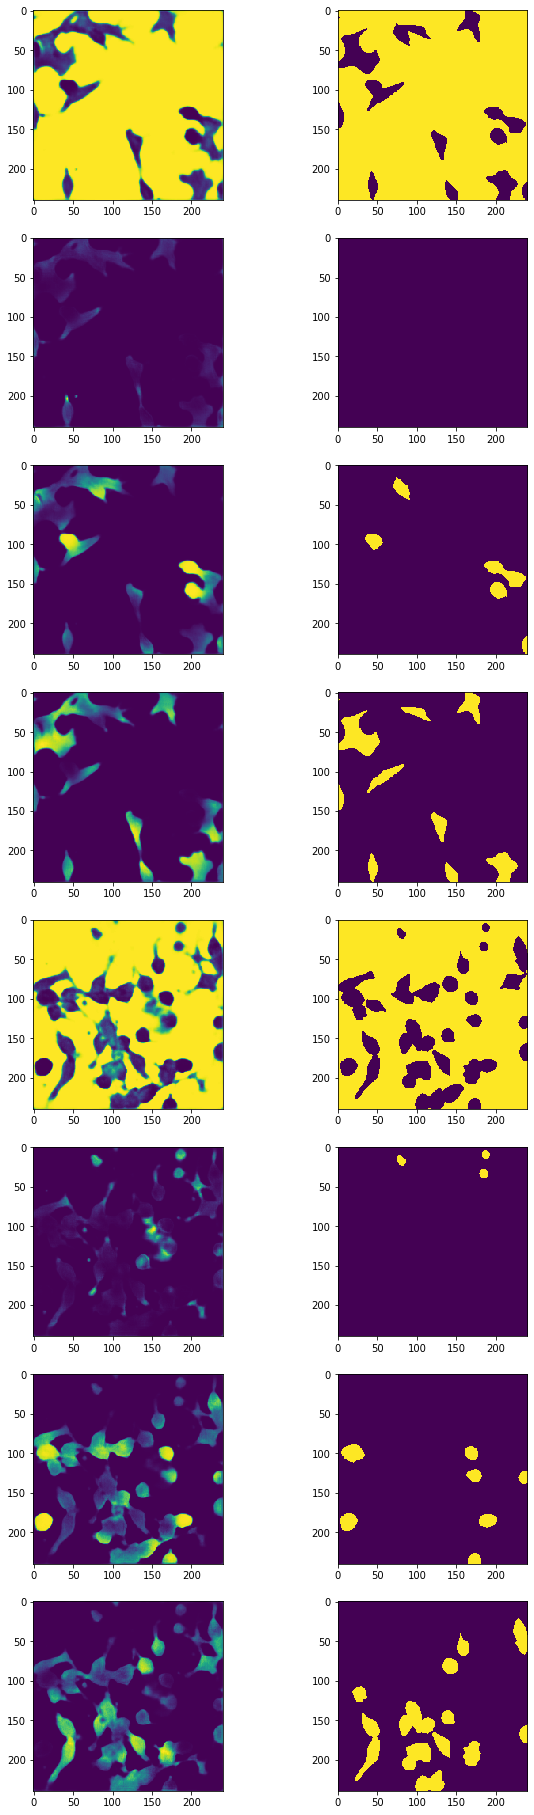

In [19]:
fig=plt.figure(figsize=(10, 200))
columns = 2
rows = results.shape[0]

for i in range(2):
    for j in range(4):

        pred = results[i][:,:,j]
        gt = mask[i][:,:,j]
        # img = im[i][:,:,j]
        # fig.add_subplot(rows*4, columns, i*j+j+1)
        # plt.imshow(img)
        fig.add_subplot(rows*4, columns, i*8+j*2+1)
        plt.imshow(pred)
        fig.add_subplot(rows*4, columns, i*8+j*2+2)
        plt.imshow(gt)
plt.show()

In [25]:
test = results[1]

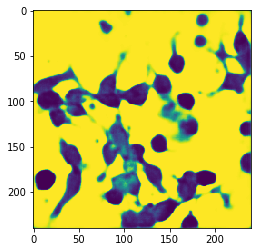

In [26]:
plt.imshow(test[:,:,0])

In [27]:
idx = test.argmax(axis=2)

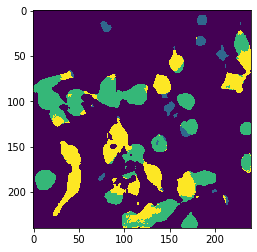

In [28]:
plt.imshow(idx)